In [1]:
import os
import wget
!python -m wget https://github.com/a5sunbro/ThinkDSP-Duc/ThinkDSP/raw/master/code/thinkdsp.python

Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Admin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Admin\anaconda3\lib\site-packages\wget.py", line 568, in <module>
    filename = download(args[0], out=options.output)
  File "C:\Users\Admin\anaconda3\lib\site-packages\wget.py", line 526, in download
    (tmpfile, headers) = ulib.urlretrieve(binurl, tmpfile, callback)
  File "C:\Users\Admin\anaconda3\lib\urllib\request.py", line 239, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "C:\Users\Admin\anaconda3\lib\urllib\request.py", line 214, in urlopen
    return opener.open(url, data, timeout)
  File "C:\Users\Admin\anaconda3\lib\urllib\request.py", line 523, in open
    response = meth(req, response)
  File "C:\Users\Admin\anaconda3\lib\urllib\request.py", line 632, in http_response

In [2]:
from thinkdsp import Sinusoid, decorate, normalize, unbias, SquareSignal
import numpy as np
class SawtoothSignal(Sinusoid):    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / 3.14*2
        ys, _ = np.modf(cycles)
        ys = normalize(unbias(ys), self.amp)
        return ys
        

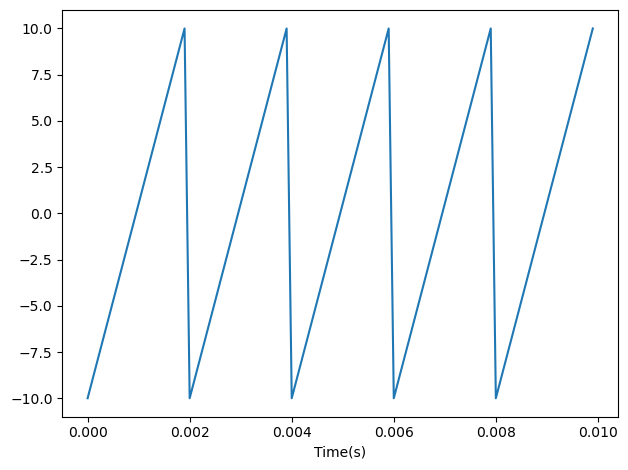

In [3]:
signal = SawtoothSignal(freq = 500, amp = 10, offset = 3.14/2)
wave = signal.make_wave(duration = 1,framerate = 10000)
segment = wave.segment(duration = 0.01)
segment.plot()
decorate(xlabel = 'Time(s)')

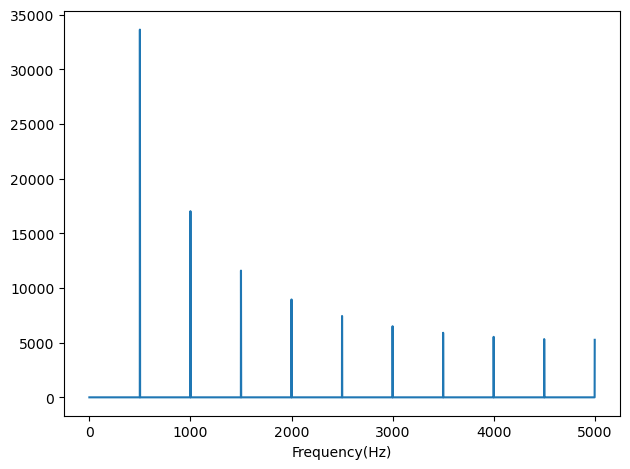

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency(Hz)')

The sawtooth wave spectrum seems to be composed of multiples of the fundamental frequency(not even, not odd, just multiples). In terms of the harmonic structure, the amplitude decreases not in proportion to the frequency(not even squared) and seems to approach roughly 1/6 of the fundamental amplitude as frequency reaches infinity.
(Since there are every multiples of 500, we dont see the aliasing. If we change the frequency to 400, we'll see the aliases)
Actually, since these amplitudes actually have aliases compounded on each other, does it counts towards the harmonic structure?(yes right? since all of them sortof receive the same "boost")

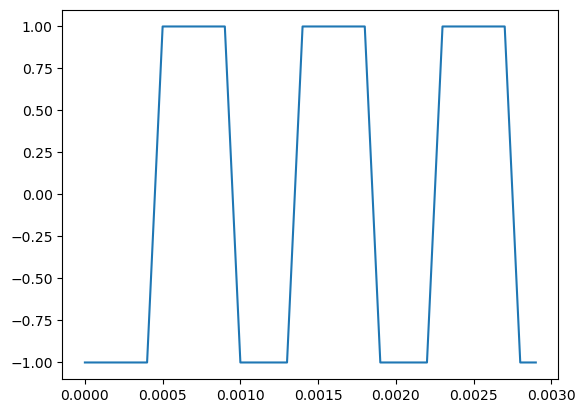

In [10]:
import thinkdsp
sqr_signal_1 = thinkdsp.SquareSignal(1100)
sqr_wave_1 = sqr_signal_1.make_wave(duration = 1, framerate = 10000)
segment_1 = sqr_wave_1.segment(duration = 0.003)
segment_1.plot()

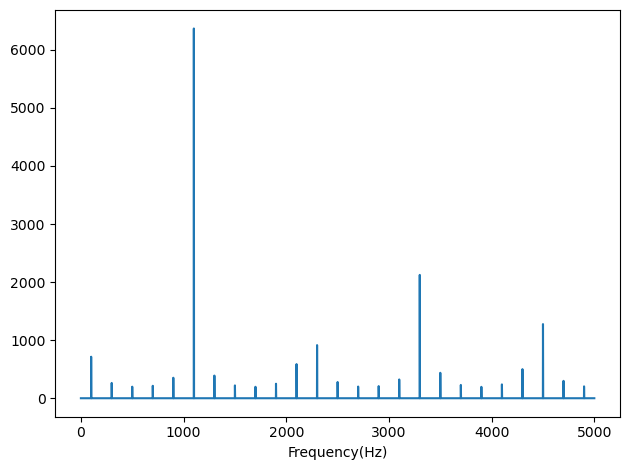

In [12]:
sqr_spectrum_1 = sqr_wave_1.make_spectrum()
sqr_spectrum_1.plot()
decorate(xlabel = 'Frequency(Hz)')

In [14]:
from IPython.display import Audio
audio_sqr_1 = Audio(data = sqr_wave_1.ys, rate = sqr_wave_1.framerate)
audio_sqr_1

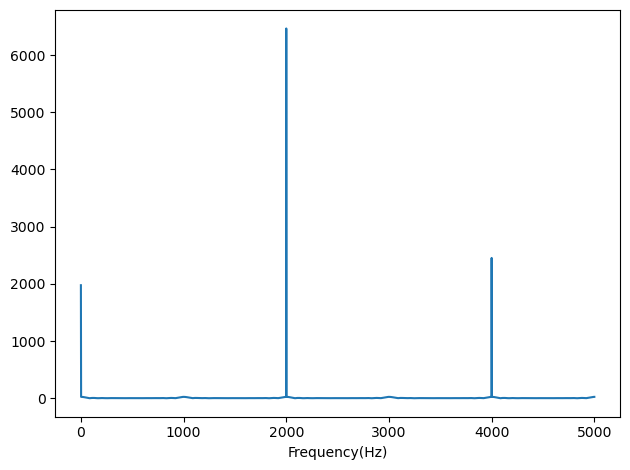

In [15]:
sqr_signal_2 = thinkdsp.SquareSignal(2000)
sqr_wave_2 = sqr_signal_2.make_wave(duration = 1, framerate = 10000)
segment_2 = sqr_wave_2.segment(duration = 0.003)
sqr_spectrum_2 = sqr_wave_2.make_spectrum()
sqr_spectrum_2.plot()
decorate(xlabel = 'Frequency(Hz)')
from IPython.display import Audio
audio_sqr_2 = Audio(data = sqr_wave_2.ys, rate = sqr_wave_2.framerate)
audio_sqr_2

You can hear the alias(the buzzing I think). The higher frequency does make the sound higher, but you can hear some interference I think.

In [16]:
print(spectrum.fs)

[0.000e+00 1.000e+00 2.000e+00 ... 4.998e+03 4.999e+03 5.000e+03]


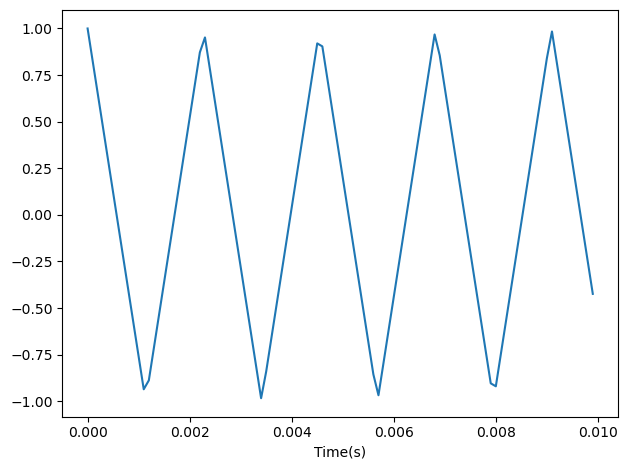

In [17]:
tri_signal = thinkdsp.TriangleSignal(440)
tri_wave = tri_signal.make_wave(duration = 1, framerate = 10000)
segment = tri_wave.segment(duration = 0.01)
segment.plot()
decorate(xlabel = 'Time(s)')

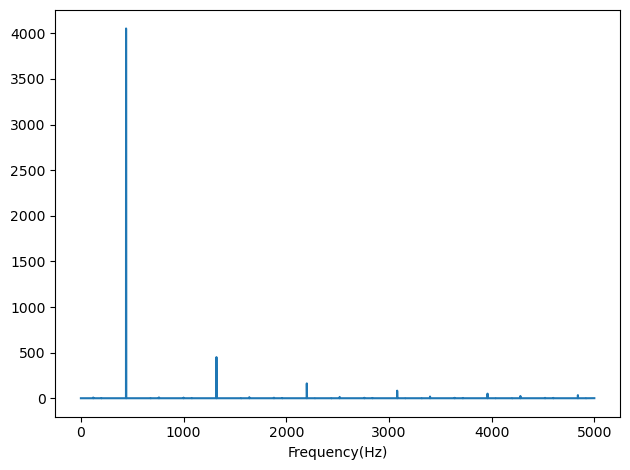

In [18]:
tri_spectrum = tri_wave.make_spectrum()
tri_spectrum.plot()
decorate(xlabel = 'Frequency(Hz)')

Reminder: do make the duration long for the wave that the spectrum is made of. If its too short, the spectrum wont be able to sample about 4000 occurances of the 440 frequency

In [19]:
print(tri_spectrum.hs[0])

(-6.412648190234904e-13+0j)


In [32]:
tri_spectrum.hs[0] = 10000
print(tri_spectrum.hs)

[ 1.00000000e+04+0.00000000e+00j  2.18564417e-13-1.07187636e-13j
 -5.53328256e-14+9.91235207e-13j ... -9.59688665e-13+5.41160580e-13j
  1.73691083e-12+2.70870424e-12j  6.40000000e-01+0.00000000e+00j]


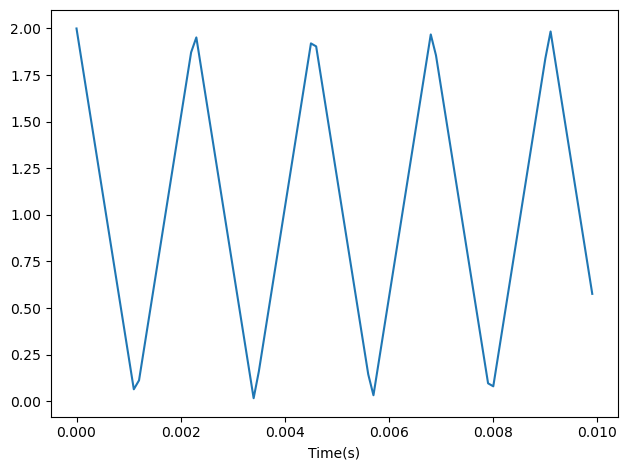

In [33]:
tri_wave_modified = tri_spectrum.make_wave()
segment = tri_wave_modified.segment(duration = 0.01)
segment.plot()
decorate(xlabel = 'Time(s)')

In [34]:
print(tri_spectrum.hs)

[ 1.00000000e+04+0.00000000e+00j  2.18564417e-13-1.07187636e-13j
 -5.53328256e-14+9.91235207e-13j ... -9.59688665e-13+5.41160580e-13j
  1.73691083e-12+2.70870424e-12j  6.40000000e-01+0.00000000e+00j]


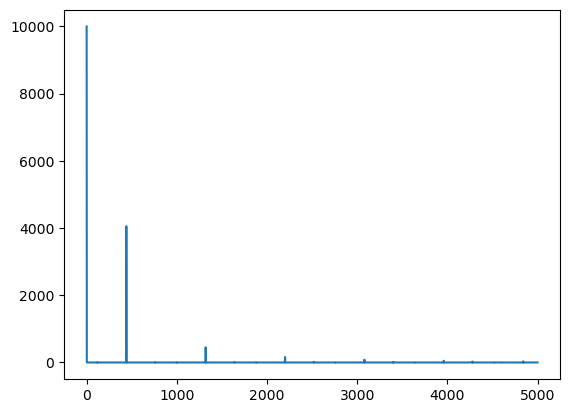

In [35]:
tri_spectrum.plot()